- **Importing keras**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

- **Importing models and layers from keras**
- **Importing mnist dataset**
- **Importing python utilities - numpy**


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2

from keras.datasets import mnist

- **Load pre-shuffled MNIST data into train and test sets**

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


- **Printing a image from the training dataset**

(60000, 28, 28)


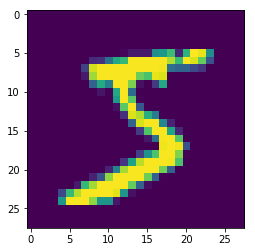

In [259]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

- **Reshaping the images as 28x28 matrix**

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

- **Normalizing both the training and test images
such that each value in the image will be b/w 0.0 and 1.0**

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

- **Listing the labels (from 0 to 9) for first 10 images**

In [262]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

- **Convert 1-dimensional class arrays to 10-dimensional class matrices**

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

- **This is how the 10 Dimentional class matrix looks like
 The position of "1." at each row is basically the label
 of the image.**

In [264]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# Input Image Normalization
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(X_train)
training_set= datagen.flow(X_train, Y_train, batch_size=128)
test_set= datagen.flow(X_test, Y_test, batch_size=128)

## Model with "batch normalization before ReLu" And "L2 Regularization"
              
 
              





                    

In [266]:
from keras.layers import Activation
model = Sequential()


#INPUT LAYER                       # Output channel dimensions | Receptive field
model.add(Conv2D(16, 3, 3, input_shape=(28,28,1))) # 26 | 3x3
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))

# CONVOLUTIONAL LAYER
model.add(Conv2D(16, (3, 3),kernel_regularizer=l2(0.01))) # 24 | 5x5
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))

#TRANSITION LAYER
model.add(MaxPooling2D(pool_size=(2, 2))) # 12 | 10x10
model.add(Conv2D(10, (1, 1), kernel_regularizer=l2(0.01))) # 12
model.add(BatchNormalization())
model.add(Activation('relu'))

#CONVOLUTIONAL LAYER
model.add(Conv2D(16, (3, 3),kernel_regularizer=l2(0.01))) #  10 | 12x12
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))
model.add(Conv2D(16, (3, 3), kernel_regularizer=l2(0.01))) #   8 | 14x14
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))
model.add(Conv2D(16, (3, 3), kernel_regularizer=l2(0.01))) #   6 | 16x16
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))
model.add(Conv2D(16, (3, 3), kernel_regularizer=l2(0.01))) #   4 | 18x18
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))

#OUTPUT LAYER
model.add(Conv2D(10, 1, activation='relu')) #4
model.add(Conv2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  


In [267]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_114 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_87 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_98 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_88 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_99 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 16)        0         
__________

- **Using stochastic gradient descent**

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])



- **Training the model with batch size of 128 images and epoch = 40**

In [269]:
# Saving the model with best validation accuracy
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

# fit model with generator
model.fit_generator(training_set, steps_per_epoch=len(training_set), epochs=40, validation_data = test_set, validation_steps = len(test_set), callbacks=[earlyStopping, mcp_save])


Epoch 1/40
469/469 [==============================] - 14s 29ms/step - loss: 0.5145 - acc: 0.9295 - val_loss: 0.7762 - val_acc: 0.7659
Epoch 2/40
469/469 [==============================] - 8s 17ms/step - loss: 0.1804 - acc: 0.9728 - val_loss: 0.2285 - val_acc: 0.9534
Epoch 3/40
469/469 [==============================] - 8s 17ms/step - loss: 0.1548 - acc: 0.9761 - val_loss: 0.2295 - val_acc: 0.9480
Epoch 4/40
469/469 [==============================] - 9s 19ms/step - loss: 0.1433 - acc: 0.9775 - val_loss: 0.2297 - val_acc: 0.9455
Epoch 5/40
469/469 [==============================] - 8s 17ms/step - loss: 0.1414 - acc: 0.9768 - val_loss: 0.1318 - val_acc: 0.9788
Epoch 6/40
469/469 [==============================] - 8s 17ms/step - loss: 0.1339 - acc: 0.9788 - val_loss: 0.2536 - val_acc: 0.9418
Epoch 7/40
469/469 [==============================] - 8s 17ms/step - loss: 0.1299 - acc: 0.9795 - val_loss: 0.1326 - val_acc: 0.9780
Epoch 8/40
469/469 [==============================] - 8s 17ms/step -

In [270]:

# evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))

Test Accuracy: 96.990


- **Finding 25 misclassified images from the validation dataset and creating an image gallery**

In [0]:
#y_pred = model.predict(X_test)

In [0]:
#print(y_pred[:9])
#print(y_test[:9])

In [273]:
#predicted_classes = model.predict_classes(X_test)



#test_set.reset()
y_pred = model.predict_generator(test_set, steps=10000, verbose=0)
y_classes = y_pred.argmax(axis=-1)
print(y_pred[:100])
print(y_classes[:100])
print(y_test[:100])

#See which we predicted correctly and incorrectly
correct_indices = np.nonzero(y_classes == y_test)[0]
incorrect_indices = np.nonzero(y_classes != y_test)[0] 
print(len(correct_indices)," classified correctly") 
print(len(incorrect_indices)," classified incorrectly")

#result = np.absolute(Y_test - newy_pred)
#print(result[:100])


[[2.81268324e-08 2.27095440e-10 1.13444196e-06 3.34526362e-08
  1.14819595e-05 1.22070310e-06 4.31771277e-08 1.75095920e-06
  9.99984264e-01 1.35782550e-08]
 [1.53876811e-01 2.09827203e-06 8.28786969e-01 6.38148142e-03
  2.10271105e-06 1.68080169e-05 4.57930983e-05 6.11949781e-06
  1.07596144e-02 1.22244499e-04]
 [2.40800148e-07 6.72807857e-07 2.17929355e-07 4.15785878e-04
  2.82792723e-08 9.99511123e-01 1.24600149e-07 2.44539478e-07
  8.51094956e-06 6.30408322e-05]
 [5.94939763e-07 9.98460889e-01 5.42354363e-04 1.02575746e-06
  8.67198978e-05 1.08553695e-06 4.97103383e-06 8.76963662e-04
  2.39288947e-05 1.50473772e-06]
 [3.88578414e-09 8.41730852e-11 1.62773904e-06 1.00019236e-06
  3.83821060e-07 1.07489903e-07 1.91304395e-08 1.59406045e-06
  9.99995232e-01 1.17715668e-08]
 [7.32615704e-11 3.18998272e-10 2.06076621e-07 9.99997854e-01
  9.44024589e-14 9.11307385e-09 7.98379443e-14 1.37831194e-06
  4.32072284e-07 1.43189971e-09]
 [4.51369579e-06 7.61311591e-01 2.37849072e-01 3.12099728e

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':
